In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
import matplotlib.image as mpimg
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from rescale_image import CreateMask
%config InlineBackend.figure_format = 'svg'

In [2]:
df_imdb = pd.read_csv('IMDB.csv')
df_douban = pd.read_csv('douban.csv')

In [236]:
len(df_both)

102

The difference:
Select different dataframe.

In [76]:
title_both = set(df_imdb['Title'])&set(df_douban['Title'])
title_imdb = set(df_imdb['Title']) - set(df_douban['Title'])
title_douban = set(df_douban['Title']) - set(df_imdb['Title'])

mask_both = df_imdb['Title'].isin(title_both)
df_both =pd.merge(df_imdb[mask_both].rename(columns={'Rating':'Rating_imdb'}),
                  df_douban.rename(columns={'Rating':'Rating_douban'})[['Title','Rating_douban']],
                  how='left',on = 'Title')

mask_imdb = df_imdb['Title'].isin(title_imdb)
df_imdb_only = df_imdb[mask_imdb]

mask_douban = df_imdb['Title'].isin(title_douban)
df_douban_only = df_imdb[mask_douban]

### What Genres are most popular in US and China?
Have a look at the wordCloud!

(-0.5, 1279.5, 890.5, -0.5)

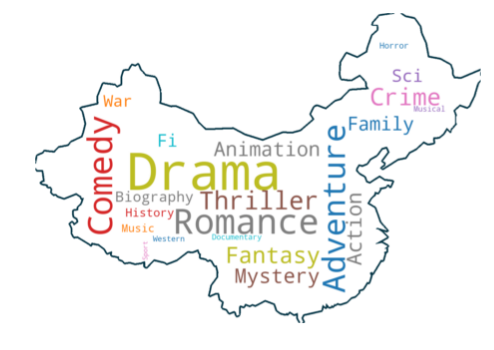

In [204]:
map_china = np.array(Image.open("images/China_map.png"))[:,:,3]
genres_douban = ' '.join(df_douban['Genres'].tolist()).replace(',', ' ')
mask = CreateMask(map_china)

wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               contour_width=3, contour_color='#013243',collocations=False,
               colormap='tab10')

wc.generate(genres_douban)
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

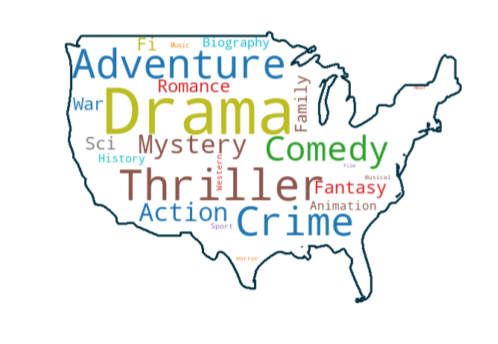

In [205]:
map_us = np.array(Image.open("images/US_map.png"))
genres_imdb = ' '.join(df_imdb['Genres'].tolist()).replace(',', ' ')
mask = CreateMask(map_us)

wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               contour_width=3, contour_color='#013243',collocations=False,
              colormap='tab10')

wc.generate(genres_imdb)
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
wc.to_file("images/US.png")

### How does the rating look like?

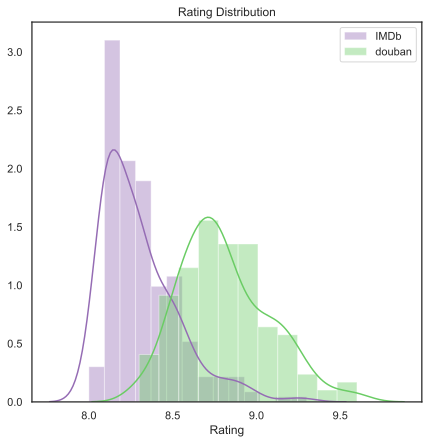

In [234]:
f, axes = plt.subplots(1, 1, figsize = (7, 7))
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(df_imdb['Rating'], color="m",ax=axes,label='IMDb')
sns.distplot(df_douban['Rating'], color="g",ax=axes,label='douban')
axes.set_title('Rating Distribution')
plt.legend()


Text(0.5,0.98,'Joint Rating Distribution')

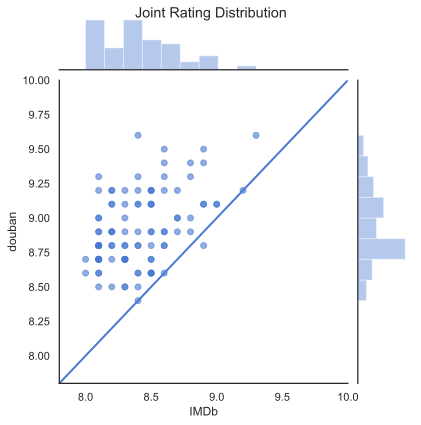

In [220]:
p = sns.jointplot('Rating_imdb','Rating_douban',data=df_both,xlim=(7.8,10),ylim=(7.8,10),
                 alpha = .6)
p.set_axis_labels('IMDb', 'douban')
p.ax_joint.plot([0, 10], [0, 10], linewidth=2)
p.fig.suptitle('Joint Rating Distribution')

### Countries?

In [162]:
# sns.set_style("whitegrid")
count_imdb = pd.Series(','.join(df_imdb['Countries'].tolist()).split(',')).value_counts()
count_douban = pd.Series(','.join(df_douban['Countries'].tolist()).split(',')).value_counts()

df_count = pd.merge(pd.DataFrame(count_imdb),pd.DataFrame(count_douban),
                    how='inner',left_index=True,right_index=True)
df_count.columns=['Counts IMDb','Counts Douban']
mask = set(df_count.sort_values('Counts IMDb',ascending =False).index[:10].tolist()) \
    | set(df_count.sort_values('Counts Douban',ascending =False).index[:10].tolist())
df_count_top10 = df_count[df_count.index.isin(mask)].sort_values('Counts Douban',ascending=False)

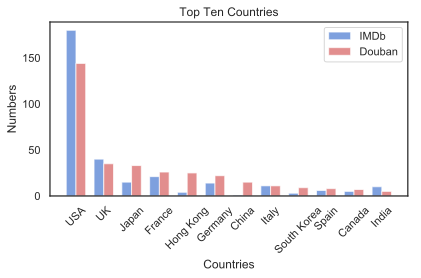

In [206]:
fig, ax = plt.subplots()
index = np.arange(len(df_count_top10))
bar_width = 0.35
opacity = 0.7
rects1 = ax.bar(index, df_count_top10['Counts IMDb'], bar_width,
                alpha=opacity, color='b',
                label='IMDb')
rects2 = ax.bar(index + bar_width, df_count_top10['Counts Douban'], bar_width,
                alpha=opacity, color='r',
                label='Douban')
ax.set_xlabel('Countries')
ax.set_ylabel('Numbers')
ax.set_title('Top Ten Countries')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(tuple(df_count_top10.index.tolist()),rotation=45)
ax.legend()
fig.tight_layout()

### Is there connection bewteern ratings and budget or year or release?

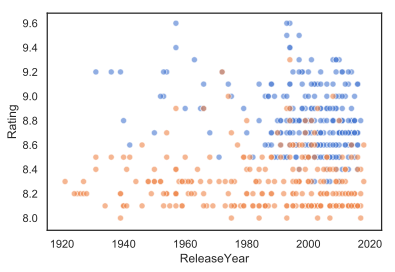

In [232]:
sns.scatterplot(x='ReleaseYear',y='Rating',data = df_douban,alpha=0.6)
sns.scatterplot(x='ReleaseYear',y='Rating',data = df_imdb,alpha=0.6)